# yul moldauer and curran phillips in Parallel Bars

## SWcaling - no improvement
## GirdSearch used

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, fbeta_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.dummy import DummyClassifier
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../../Combine_Data/men/pb_encoded.csv')
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_pb.csv')
pbnames = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_pbnames.csv')
pbolymp = pd.read_csv('../../Data/cleandata22-23/men22_23.csv')


# Base line using ZeroR

In [4]:

X = df.drop(columns=['medal'])  
y = df['medal']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9)

# Initialize  ZeroR classifier
zero_r_clf = DummyClassifier(strategy='most_frequent', random_state=42)

zero_r_clf.fit(X_train, y_train)

# Make predictions on  test data
y_pred = zero_r_clf.predict(X_test)

# Evaluate  model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("ZeroR Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


ZeroR Classifier
Accuracy: 0.9689
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       156
           1       0.00      0.00      0.00         5

    accuracy                           0.97       161
   macro avg       0.48      0.50      0.49       161
weighted avg       0.94      0.97      0.95       161

Confusion Matrix:
[[156   0]
 [  5   0]]


# Model Comparison


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score
from sklearn.pipeline import make_pipeline

# Assuming you have a DataFrame df with your data
# For example, let's assume 'medal' is the target column, and you want to drop it for the features
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
}

results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name not in ["XGBoost", "Naive Bayes", "Neural Network"]:
        clf = make_pipeline(StandardScaler(), clf)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    beta = 2
    f2_score = fbeta_score(y_test, y_pred, beta=beta)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "f2_score": f2_score,
    }

for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F2-Score: {result['f2_score']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Classifier: Logistic Regression
Accuracy: 0.9627
F2-Score: 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       156
           1       0.00      0.00      0.00         5

    accuracy                           0.96       161
   macro avg       0.48      0.50      0.49       161
weighted avg       0.94      0.96      0.95       161

Confusion Matrix:
[[155   1]
 [  5   0]]

Classifier: XGBoost
Accuracy: 0.9752
F2-Score: 0.4348
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       156
           1       0.67      0.40      0.50         5

    accuracy                           0.98       161
   macro avg       0.82      0.70      0.74       161
weighted avg       0.97      0.98      0.97       161

Confusion Matrix:
[[155   1]
 [  3   2]]

Classifier: Random Forest
Accuracy: 0.9752
F2-Score: 0.2381
Classification Report:
             

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

# Assuming you have a DataFrame df with your data
# For example, let's assume 'medal' is the target column, and you want to drop it for the features
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=9)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(),
}

results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name != "XGBoost":
        clf = make_pipeline(StandardScaler(), clf)

    # Fit the model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    beta = 2
    f2_score = fbeta_score(y_test, y_pred, beta=beta)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "f2_score": f2_score,
    }
    
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F2-Score: {result['f2_score']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Classifier: Logistic Regression
Accuracy: 0.9627
F2-Score: 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       156
           1       0.00      0.00      0.00         5

    accuracy                           0.96       161
   macro avg       0.48      0.50      0.49       161
weighted avg       0.94      0.96      0.95       161

Confusion Matrix:
[[155   1]
 [  5   0]]

Classifier: XGBoost
Accuracy: 0.9752
F2-Score: 0.4348
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       156
           1       0.67      0.40      0.50         5

    accuracy                           0.98       161
   macro avg       0.82      0.70      0.74       161
weighted avg       0.97      0.98      0.97       161

Confusion Matrix:
[[155   1]
 [  3   2]]

Classifier: SVM
Accuracy: 0.9689
F2-Score: 0.0000
Classification Report:
              precision

In [6]:
df = pd.read_csv('../../Combine_Data/men/pb_encoded.csv')

name_counts = df['Name'].value_counts()

# Extract names that appear 2 or more times
names_with_multiple_occurrences = name_counts[name_counts >= 2].index

# Filter the DataFrame based on condition
df_filtered_names = df[df['Name'].isin(names_with_multiple_occurrences)]
df=df_filtered_names.copy()

# Grid Search

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame df with your data
# For example, let's assume 'medal' is the target column, and you want to drop it for the features
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Define a parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to initialize the final model
final_model = XGBClassifier(**best_params)

# Train the final model
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")


Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 200}
Accuracy: 0.9905


# Feature Importance

Feature Importances:
Rank: 0.2014
D: 0.3239
E: 0.0565
ND: 0.0000
Total: 0.0875
year: 0.1975
Name: 0.0543
Nation: 0.0658
round_final: 0.0131
round_qual: 0.0000
Accuracy: 0.99
Precision: 0.75
Recall: 1.00
Confusion Matrix:
[[101   1]
 [  0   3]]


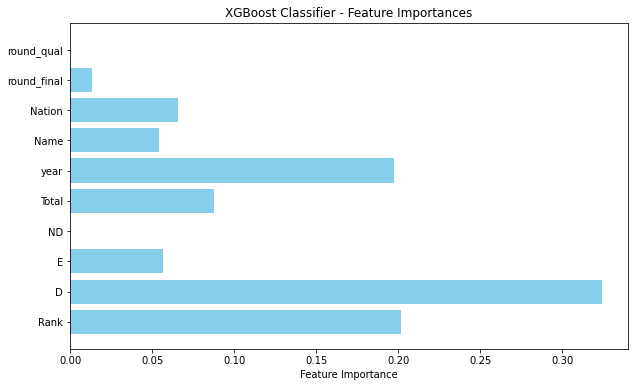

In [8]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt

# Assuming you have X_train, X_test, y_train, y_test already defined

# MaxAbsScaler to scale features
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set XGBoost best parameters
params = {
    'learning_rate': 0.2,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 200,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss', 
    'seed': 42
}

# Create and fit XGBoost model
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train_scaled, y_train)

# Extract feature importances from the trained XGBoost model
feature_importances = xgb_model.feature_importances_

# Print feature importances
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Make predictions
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('XGBoost Classifier - Feature Importances')
plt.show()


# Final Model

In [9]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd

X = df.drop(columns=['medal'])
y = df['medal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# MaxAbsScaler to scale  features
scaler = MaxAbsScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set XGBoost best parameters
params = {
    'learning_rate': 0.2,
    'max_depth': 3,
    'min_child_weight': 1,
    'n_estimators': 200,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss', 
    'seed': 42
}

# Create  fit XGBoost 
xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train_scaled, y_train)

# prediction
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.99
Precision: 0.75
Recall: 1.00
Confusion Matrix:
[[101   1]
 [  0   3]]


# Model Trained earlier, now using 2023/2022 data

In [10]:
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_pb.csv')
olymp.rename(columns={'D Score': 'D', 'E Score': 'E',
                     'Pen.': 'ND', 'nation': 'Nation'}, inplace=True)
olymp=olymp.drop(columns=['round_TeamFinal', 'round_AAfinal', 'round_TeamQual'])

In [11]:
y_pred=final_model.predict(olymp)

In [12]:
ypreds  = pd.Series(y_pred)
olymp['ypred']=ypreds


In [13]:
filtered_df = olymp[olymp['ypred'] == 1]

In [14]:
filtered_df['Name'].unique()

array([390, 286, 747, 746,  20, 139, 719, 552, 384, 716, 333,  21])

# pbnames used to match encoded names with actual names

In [15]:
name_encoded_values = [390, 286, 747, 746,  20, 139, 719, 552, 384, 716, 333,  21]

# Filter the DataFrame to get the corresponding "Name" values
result = pbnames.loc[pbnames['Name_encoded'].isin(name_encoded_values), 'Name']


In [16]:
result.unique()

array(['kazuma kaya', 'illia kovtun', 'yul moldauer',
       'yul kyung tae moldauer', 'ahmet onder', 'curran phillips',
       'wichol ri', 'noe seifert', 'kakeru tanigawa', 'wataru tanigawa',
       'jingyuan zou', 'ahmet önder'], dtype=object)

# pbolymp used to get country info from name list above

In [17]:
pbolymp["Name"]=pbolymp["Name"].str.lower()

In [18]:
names_to_filter =['kazuma kaya', 'illia kovtun', 'yul moldauer',
       'yul kyung tae moldauer', 'ahmet onder', 'curran phillips',
       'wichol ri', 'noe seifert', 'kakeru tanigawa', 'wataru tanigawa',
       'jingyuan zou', 'ahmet önder']
# Filter the DataFrame to get rows with the specified "Name" values
result = pbolymp[pbolymp['Name'].isin(names_to_filter)]


In [19]:
result['Country'].value_counts()

Country
UKR    151
USA     96
JPN     84
TUR     62
SUI     56
CHN     16
PRK     11
Name: count, dtype: int64

# Find names from USA

In [20]:
usa = result[result['Country']=='USA']

In [21]:
usa['Name'].unique()

array(['yul moldauer', 'yul kyung tae moldauer', 'curran phillips'],
      dtype=object)